# Sales Prediction using Python

#### Task:-

- Sales prediction means predicting how much of a product people will buy based on factors such as the amount you spend to advertise your product, the segment of people you advertise for, or the platform you are advertising on about your product.
- Typically, a product and service-based business always need their Data Scientist to predict their future sales with every step they take to manipulate the cost of advertising their product. So let’s start the task of sales prediction with machine learning using Python.

## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

## Loading and Exploring Dataset

In [3]:
df = pd.read_csv('Advertising.csv')
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.shape

(200, 5)

In [5]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.sample(5)

,TV,Radio,Newspaper,Sales
53,182.6,46.2,58.7,21.2
126,7.8,38.9,50.6,6.6
78,5.4,29.9,9.4,5.3
19,147.3,23.9,19.1,14.6
21,237.4,5.1,23.5,12.5


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

## Data Visualization

<Axes: xlabel='Sales', ylabel='Count'>

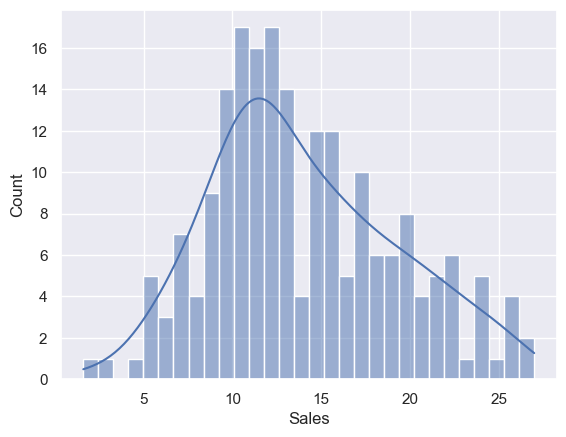

In [9]:
sns.histplot(df['Sales'], bins=30, kde=True)

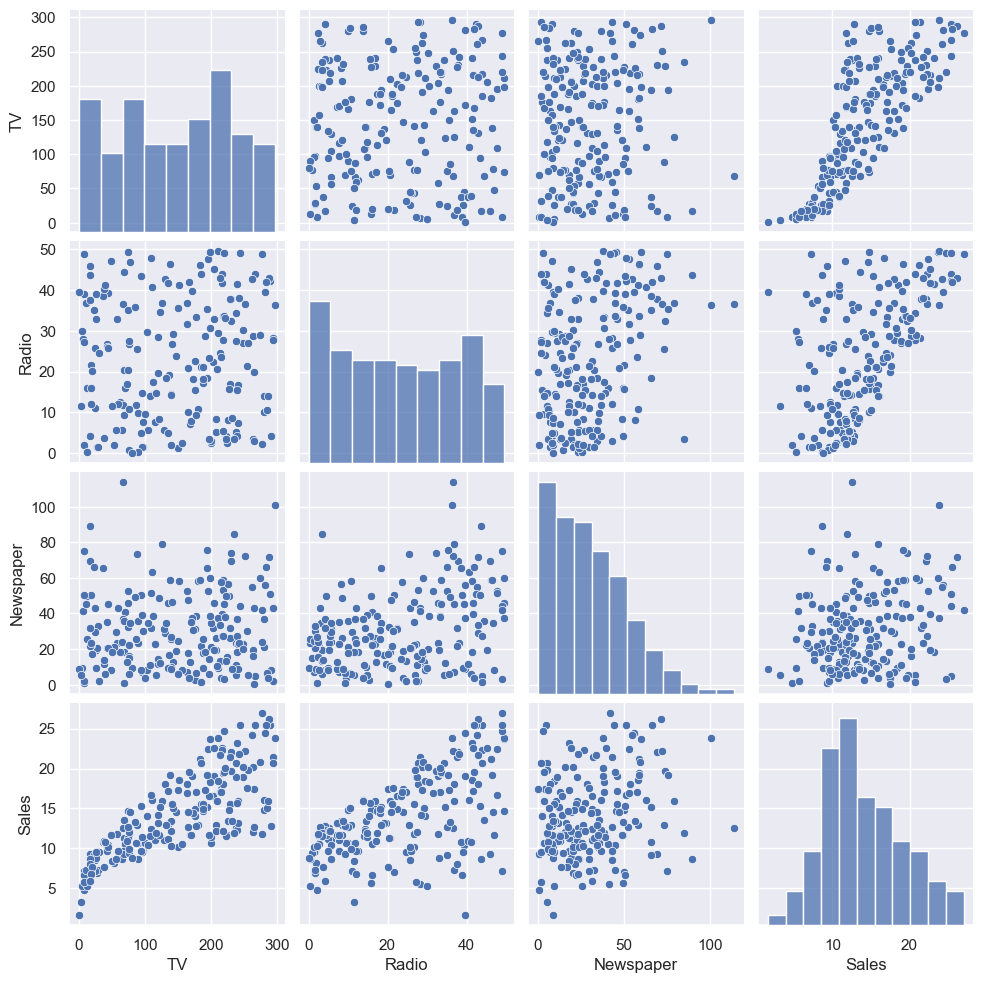

In [10]:
# To visualize the relationships between all numeric features
sns.pairplot(df)

## Correlation Matrix

<Axes: >

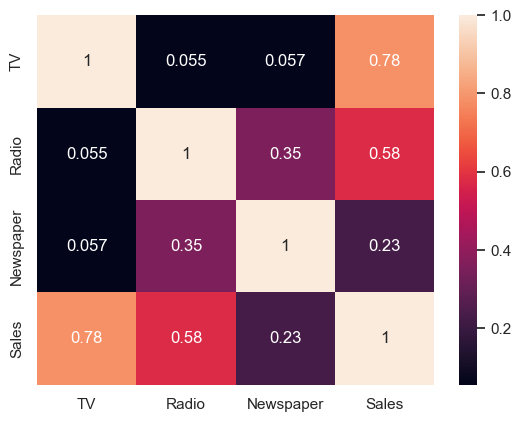

In [11]:
matrix = df[['TV', 'Radio', 'Newspaper', 'Sales']].corr()
sns.heatmap(matrix, annot=True)

## Outliers Detection

In [12]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
((df < lower_limit) | (df > upper_limit)).sum()

TV           0
Radio        0
Newspaper    2
Sales        0
dtype: int64

In [13]:
def outlier_detect(df):
    for column in df.describe().columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound),
                              df[column].median(), df[column])

    return df

df_no_outliers = outlier_detect(df)

In [14]:
df_no_outliers

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


## Building the Model

In [15]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

In [16]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
len(x_train), len(y_train)

(160, 160)

In [18]:
len(x_test), len(y_test)

(40, 40)

In [19]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [20]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [21]:
model.score(x_test, y_test)

0.8866543661181691

## Evaluating the model

In [22]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 3.5775955411823475


In [23]:
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2*100}')

R-squared: 88.6654366118169


In [24]:
actual_predict= pd.DataFrame({
    'Actual': y_test.values.flatten(),
    'Predicted': y_pred.flatten()})
actual_predict.head()

,Actual,Predicted
0,16.9,16.585918
1,22.4,20.945162
2,21.4,21.350525
3,7.3,11.248898
4,24.7,22.138614


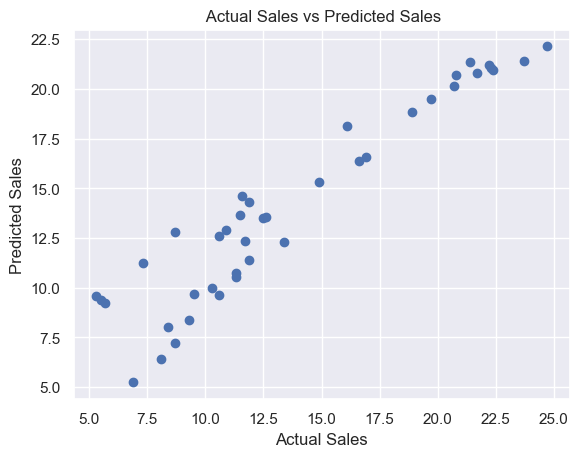

In [25]:
plt.scatter(y_test, y_pred)
plt.title(" Actual Sales vs Predicted Sales")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.show()

In [26]:
import statsmodels.api as sm
stats = sm.OLS(y, X).fit()

In [27]:
stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              3589.
Date:                Sat, 13 Jan 2024   Prob (F-statistic):                   1.29e-171
Time:                        13:53:14   Log-Likelihood:                         -422.90
No. Observations:                 200   AIC:                                      851.8
Df Residuals:                     197   BIC:                                      861.7
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0536      0.001     40.326      0.000       0.051       0.056
Radio          0.2209      0.009     23.504      0.000       0.202       0.239
Newspaper      0.0194      0.007      2.766      0.006       0.006       0.033
==============================================================================
Omnibus:                        6.659   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.036   Jarque-Bera (JB):                7.913
Skew:                          -0.259   Prob(JB):                       0.0191
Kurtosis:                       3.825   Cond. No.                         12.8
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""